### Problem Statement

A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs

**Data Definition**

* age: Age of the policyholder (Numeric)
* sex: Gender of the policyholder (Categoric)
* weight: Weight of the policyholder (Numeric)
* BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
* no_of_dependents: Number of dependent persons on the policyholder (Numeric)
* smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
* claim: The amount claimed by the policyholder (Numeric) in dollars
* blood pressure: Blood pressure reading of policyholder (Numeric)
* diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
* regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)
* job_title: Job profile of the policyholder (Categoric)
* city: The city in which the policyholder resides (Categoric) 
* hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sma
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [10, 6]

**Models that we create Today**

* EDA
* Statistical Validation - (T-Test and Anova)
* Models - Basic Statistical Model, Linear Regression(Sklearn), Ridge, Lasso, Elastic Net, SGD Regressor & their Parameter Tuning.

In [113]:
health = pd.read_csv("~/Downloads/healthinsurance (1).csv")

In [114]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


### Univariate Analysis

In [6]:
health.select_dtypes(include = np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

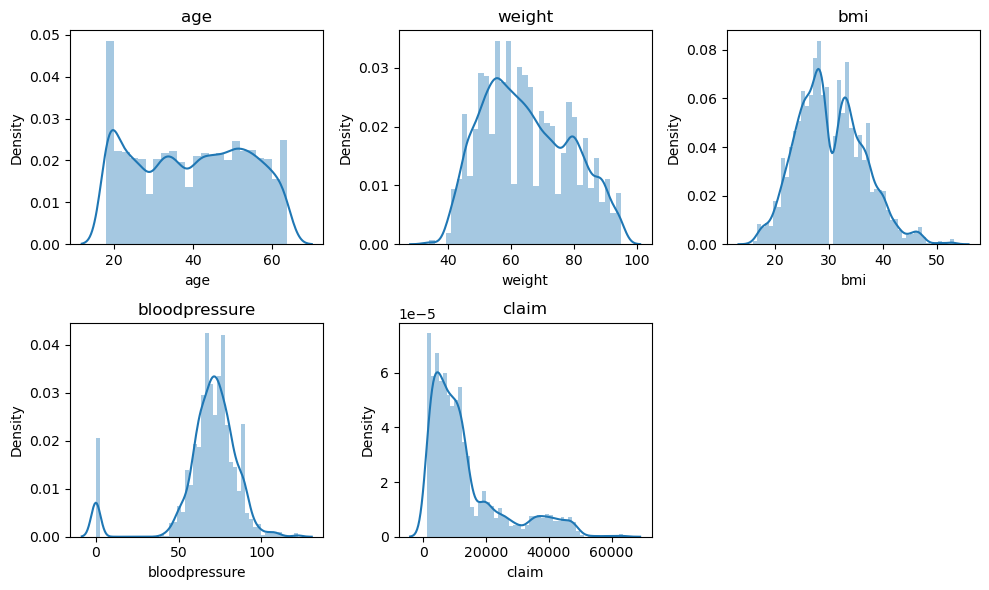

In [8]:
num_cols = ['age', 'weight', 'bmi', 'bloodpressure','claim']

nrows = 2
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(health.loc[:, i])
    plt.title(i)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

In [11]:
health.select_dtypes(include = ["object", "int64"]).columns

Index(['sex', 'weight', 'hereditary_diseases', 'no_of_dependents', 'smoker',
       'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title'],
      dtype='object')

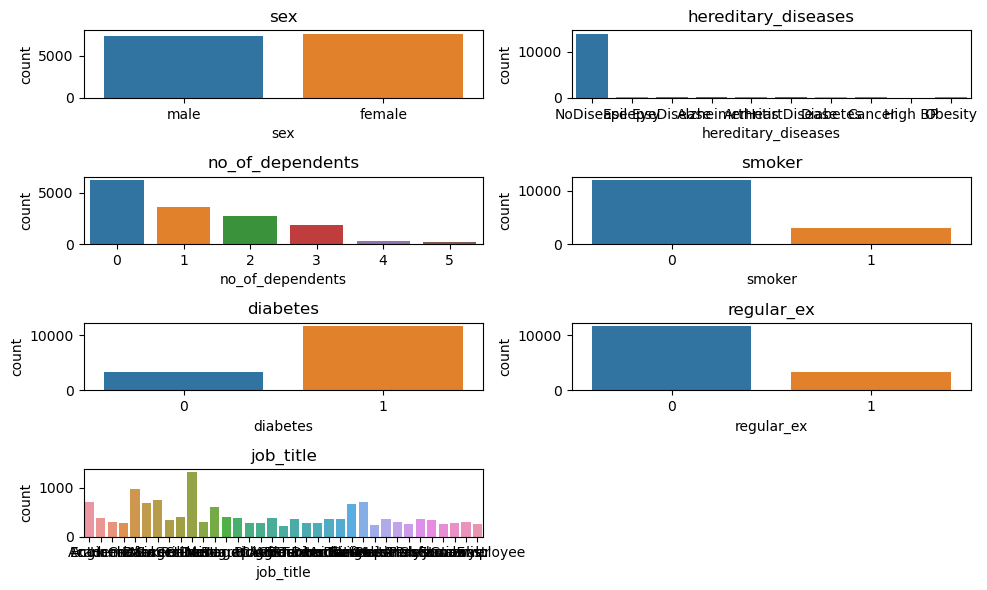

In [12]:
cat_cols = ['sex', 'hereditary_diseases', 'no_of_dependents', 'smoker',
           'diabetes', 'regular_ex', 'job_title']

nrows = 4
ncols = 2
repeat = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, repeat)
    sns.countplot(health.loc[:, i])
    plt.title(i)
    repeat+=1
    
plt.tight_layout()
plt.show()

In [16]:
(health.hereditary_diseases.value_counts()/health.shape[0])*100

NoDisease       93.320000
Diabetes         0.986667
Alzheimer        0.960000
Obesity          0.906667
EyeDisease       0.820000
Cancer           0.726667
Arthritis        0.640000
HeartDisease     0.620000
Epilepsy         0.560000
High BP          0.460000
Name: hereditary_diseases, dtype: float64

In [18]:
health.job_title.value_counts()[:5] # Top 5 Job Titles...

Student       1320
HomeMakers     972
Singer         744
Actor          720
FilmMaker      714
Name: job_title, dtype: int64

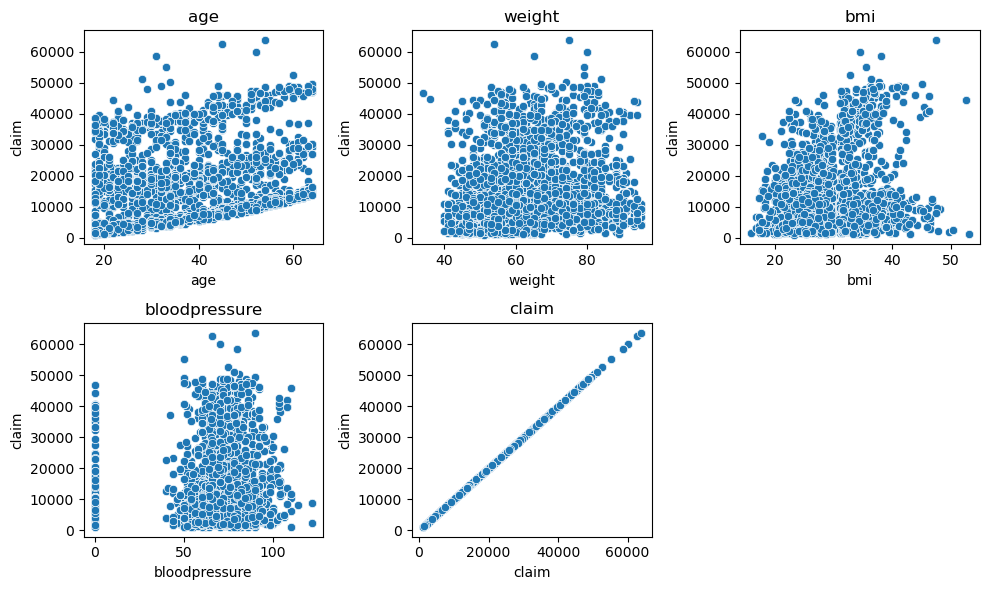

In [19]:
# Bivariate ~ Num vs Num

nrows = 2
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(health.loc[:, i], health.claim)
    plt.title(i)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

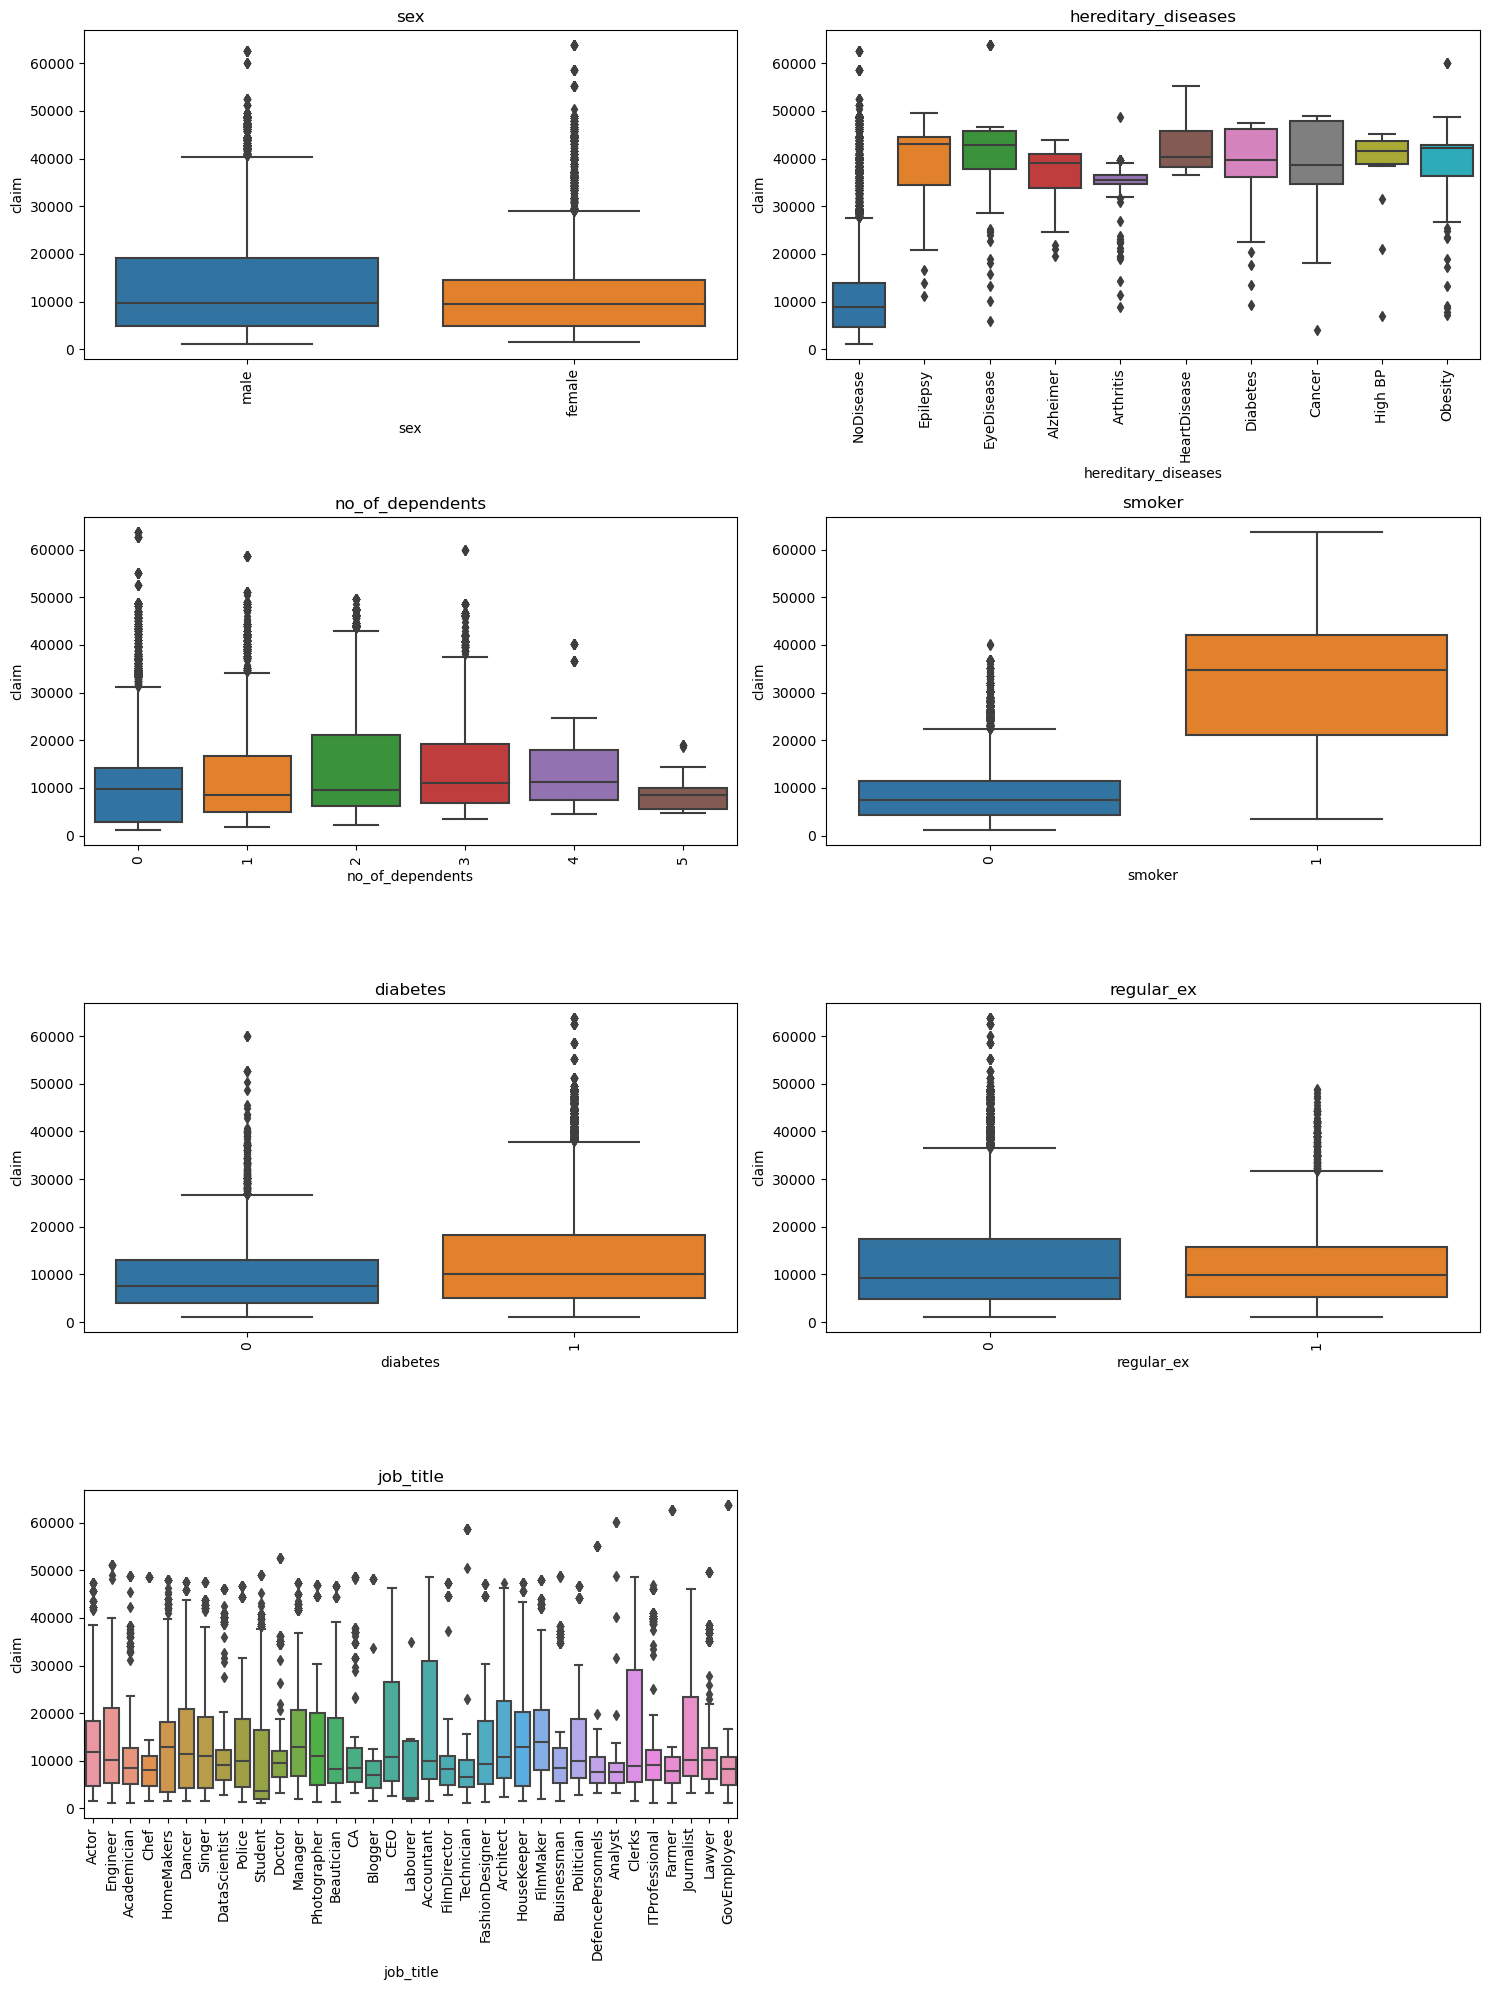

In [21]:
# Bivariate ~ Cat vs Number
nrows = 4
ncols = 2
repeat = 1

plt.figure(figsize=(15, 20)) 
for i in cat_cols:
    plt.subplot(nrows, ncols, repeat)
    sns.boxplot(health.loc[:, i], health.claim)
    plt.title(i)
    repeat+=1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='job_title'>

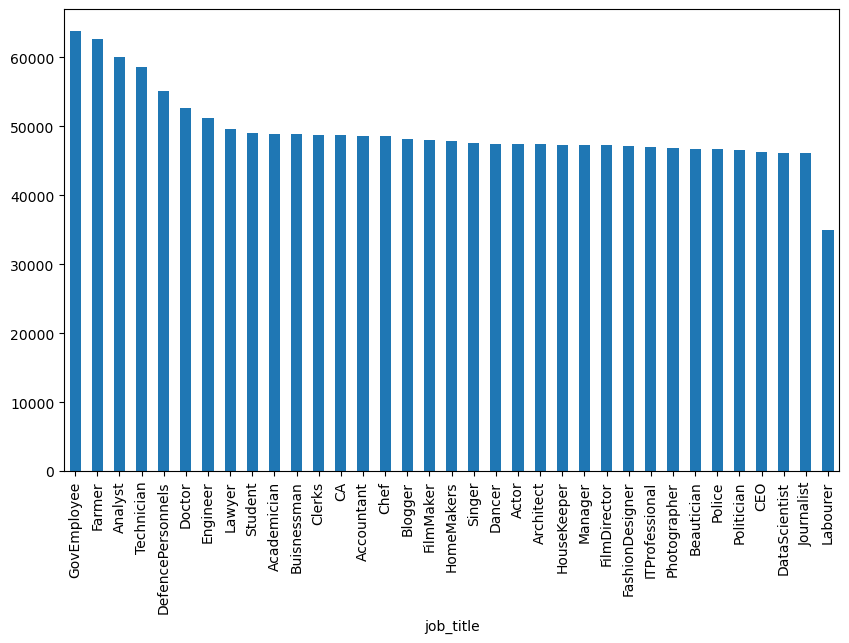

In [25]:
# Job Title with Max Claim Amount
health.groupby("job_title")["claim"].max().\
sort_values(ascending = False).plot(kind = "bar")

In [27]:
# Missing Values
health.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [29]:
# Feature Engineering

health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [30]:
health.hereditary_diseases.unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [115]:
fatal = ['Diabetes', 'HeartDisease', 'Cancer', 'High BP', 
        'Epilepsy', 'Alzheimer']

In [116]:
def fatalities(x):
    if x in fatal:
        return("Fatal")
    else:
        return("Non_Fatal")

In [117]:
health["Diseases"] = health.hereditary_diseases.apply(fatalities)

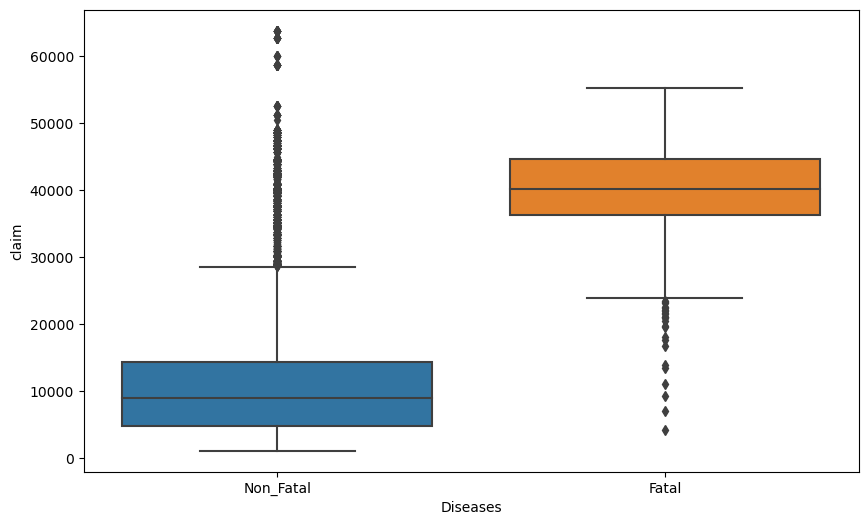

In [118]:
sns.boxplot(x = "Diseases", y = "claim", data = health)
plt.show()

In [119]:
# 0: Singles
# 1-3: Small Family
# >3: Large Family

def family(x):
    if x==0:
        return("No_Dependents")
    elif(x<=3):
        return("Small_Family")
    else:
        return("Large_Family")

In [120]:
health["Family"] = health.no_of_dependents.apply(family)

<AxesSubplot:xlabel='Family', ylabel='claim'>

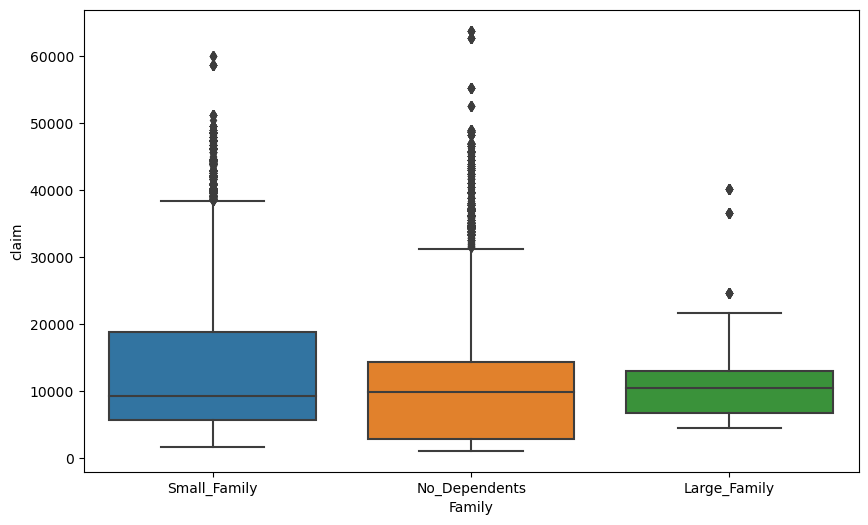

In [39]:
sns.boxplot(x = "Family", y = "claim", data = health)

In [40]:
from statsmodels.formula.api import ols
model = ols("claim~Family", data = health).fit()

In [41]:
#Ho: Feature is not Significant. There is no relation b/w family & claim
#Ha: Feature is Significant. There is relation b/w family & claim
sma.stats.anova_lm(model)

# Since Pvalue is less than 0.05, We Reject the Ho.

,df,sum_sq,mean_sq,F,PR(>F)
Family,2.0,1.627439e+10,8.137197e+09,55.53861,9.306229e-25
Residual,14997.0,2.197274e+12,1.465142e+08,NaN,NaN


In [42]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Diseases,Family
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non_Fatal,Small_Family
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non_Fatal,Small_Family
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Fatal,Small_Family
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Non_Fatal,Small_Family
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non_Fatal,No_Dependents


In [121]:
# Job title
health.job_title.unique()
# Artist, Blue Collar, Govt, Corp and SE, Others ~ List of Cats...

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [122]:
blue_collar = ["Labourer", "Technician", "HouseKeeper", "Farmer"]

self_emp = ["Actor", "Dancer", "Singer",  
           "Photographer", "Beautician", 
            "CA", "Blogger", "FilmDirector",
           "FashionDesigner", "Architect", "FilmMaker", "Buisnessman", 
           "Lawyer"]

salaried = ["Engineer", "Academician", "Chef", "DataScientist", "Police",
           "Manager", "CEO", "Accountant", 
            "Politician", "DefencePersonnels",
           "Analyst", "Clerks", "ITProfessional",
            "Journalist", "GovEmployee", "Doctor"]

unemployed = ["HomeMakers", "Student"]

In [101]:
len(blue_collar)+len(salaried)+len(self_emp)+len(unemployed)

35

In [123]:
def jobs(x):
    if x in blue_collar:
        return("Blue_Collar")
    elif x in self_emp:
        return("Self_Employed")
    elif x in salaried:
        return("Salaried")
    else:
        return("Jobless")

In [124]:
health["work_titles"] = health.job_title.apply(jobs)

<AxesSubplot:xlabel='work_titles', ylabel='claim'>

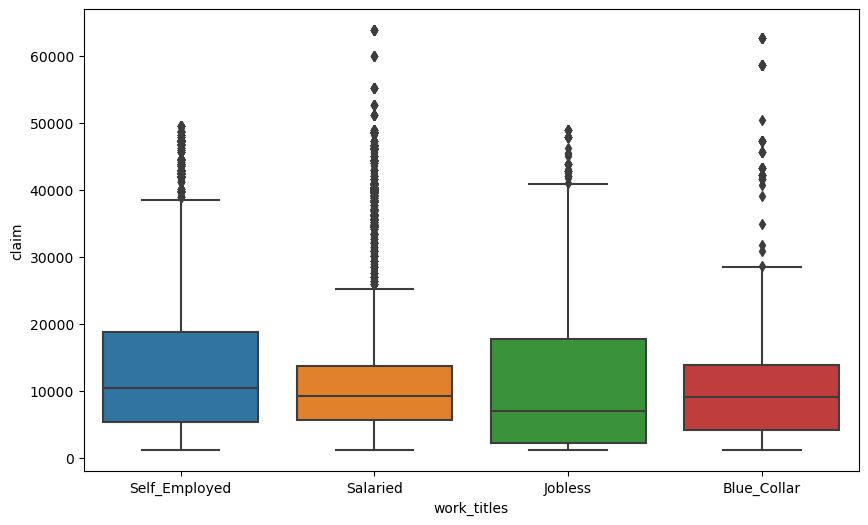

In [111]:
sns.boxplot(x = "work_titles", y = "claim", data = health)

In [56]:
# Age 
health.age.describe() # 18-64

count    14604.000000
mean        39.547521
std         14.015966
min         18.000000
25%         27.000000
50%         40.000000
75%         52.000000
max         64.000000
Name: age, dtype: float64

In [58]:
# Missing Values
health.isnull().sum()[health.isnull().sum()!=0]

age    396
bmi    956
dtype: int64

In [60]:
# Pull the df where age is na
health.loc[health.age.isnull()].head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Diseases,Family,work_titles
76,NaN,female,88,29.6,NoDisease,1,0,Montrose,78,0,0,Singer,3947.4,Non_Fatal,Small_Family,Self_Employed
82,NaN,female,64,24.6,NoDisease,2,0,SanLuis,70,0,1,DataScientist,4529.5,Non_Fatal,Small_Family,Salaried
105,NaN,female,73,20.2,NoDisease,2,0,Raleigh,74,0,0,CEO,4906.4,Non_Fatal,Small_Family,Salaried
106,NaN,female,71,21.8,NoDisease,1,1,Houston,84,1,0,Singer,16657.7,Non_Fatal,Small_Family,Self_Employed
110,NaN,female,70,34.3,NoDisease,5,0,LosAngeles,82,1,0,Analyst,8596.8,Non_Fatal,Large_Family,Salaried


In [125]:
health.groupby("Family")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
Family,,,,,,,,
Large_Family,496.0,38.223790,11.829270,18.0,28.0,39.0,48.0,61.0
No_Dependents,6178.0,38.517158,16.367643,18.0,22.0,36.0,55.0,64.0
Small_Family,7930.0,40.433039,11.943190,18.0,31.0,41.0,50.0,64.0


In [126]:
health.groupby("no_of_dependents")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,,,,,,,,
0,6178.0,38.517158,16.367643,18.0,22.0,36.0,55.0,64.0
1,3542.0,39.607566,11.770570,18.0,31.0,40.0,48.0,64.0
2,2629.0,40.349943,11.654332,18.0,32.0,41.0,50.0,64.0
3,1759.0,42.219443,12.516412,18.0,31.0,43.0,53.0,64.0
4,296.0,40.334459,11.940231,18.0,33.0,40.0,49.0,61.0
5,200.0,35.100000,10.967746,19.0,25.0,33.0,45.0,52.0


In [127]:
health.groupby("sex")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,7387.0,39.361040,14.111861,18.0,26.0,40.0,51.5,64.0
male,7217.0,39.738395,13.915518,18.0,27.0,40.0,52.0,64.0


In [133]:
health.groupby(["work_titles"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
work_titles,,,,,,,,
Blue_Collar,1397.0,38.938440,14.779388,18.0,25.0,39.0,52.0,64.0
Jobless,2267.0,30.677106,14.965740,18.0,19.0,22.0,42.0,64.0
Salaried,5333.0,41.850178,12.018984,18.0,32.0,43.0,52.0,64.0
Self_Employed,5607.0,41.095595,13.785852,18.0,28.0,42.0,54.0,64.0


In [132]:
health.work_titles.value_counts()

Self_Employed    5777
Salaried         5513
Jobless          2292
Blue_Collar      1418
Name: work_titles, dtype: int64

In [83]:
# Age vs Work_Titles
model = ols("age~work_titles", data = health.dropna()).fit()

In [84]:
sma.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
work_titles,3.0,1.756902e+05,58563.407834,317.73952,1.990705e-199
Residual,13644.0,2.514762e+06,184.312634,NaN,NaN


In [93]:
health.loc[:, ["age", "claim"]].corr()

,age,claim
age,1.000000,0.297721
claim,0.297721,1.000000


In [134]:
health.loc[(health.work_titles=="Blue_Collar") & 
           (health.age.isnull()), "age"] = 39.0

In [135]:
health.loc[(health.work_titles=="Jobless") & 
           (health.age.isnull()), "age"] = 22.0

In [136]:
health.loc[(health.work_titles=="Salaried") & 
           (health.age.isnull()), "age"] = 43.0

In [137]:
health.loc[(health.work_titles=="Self_Employed") & 
           (health.age.isnull()), "age"] = 42.0

In [92]:
health.isnull().sum()[health.isnull().sum()!=0]

bmi    956
dtype: int64

In [143]:
health.loc[:, ["bmi", "weight", "age", "claim"]].corr()

,bmi,weight,age,claim
bmi,1.000000,0.251649,0.182298,0.206588
weight,0.251649,1.000000,0.280723,0.077716
age,0.182298,0.280723,1.000000,0.297446
claim,0.206588,0.077716,0.297446,1.000000


In [142]:
health.bmi.describe()

count    14044.000000
mean        30.266413
std          6.122950
min         16.000000
25%         25.700000
50%         29.400000
75%         34.400000
max         53.100000
Name: bmi, dtype: float64

In [145]:
health.groupby("hereditary_diseases")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
hereditary_diseases,,,,,,,,
Alzheimer,134.0,30.929851,4.815842,24.0,25.400,31.40,35.0,38.4
Arthritis,79.0,30.837975,3.330523,23.3,28.950,31.70,34.6,37.6
Cancer,96.0,34.593750,6.486079,23.8,27.675,34.35,40.9,45.5
Diabetes,135.0,34.857778,5.335735,20.5,33.900,35.50,36.7,46.2
Epilepsy,74.0,30.852703,9.928142,17.8,22.875,26.35,39.0,45.0
EyeDisease,121.0,37.005785,5.347714,22.5,33.000,36.50,37.1,47.4
HeartDisease,93.0,35.721505,9.263343,25.8,28.200,33.30,38.4,52.6
High BP,69.0,33.607246,2.049915,24.3,32.500,34.60,34.6,37.9
NoDisease,13135.0,30.028344,6.039779,16.0,25.600,29.00,34.1,53.1


In [146]:
health.groupby("Diseases")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
Diseases,,,,,,,,
Fatal,601.0,33.436772,6.891623,17.8,28.2,33.9,37.1,52.6
Non_Fatal,13443.0,30.124675,6.047916,16.0,25.7,29.2,34.2,53.1


In [148]:
health.loc[health.bmi.isnull(), "hereditary_diseases"].unique()

array(['NoDisease', 'Cancer', 'Obesity', 'Arthritis', 'Epilepsy',
       'Alzheimer', 'Diabetes', 'EyeDisease'], dtype=object)

In [150]:
# Fill BMI basis Hereditary Diseases
health.loc[(health.hereditary_diseases=="NoDisease")&
          (health.bmi.isnull()), "bmi"] = \
health.loc[health.hereditary_diseases=="NoDisease", "bmi"].median()

In [151]:
illness = ['Cancer', 'Obesity', 'Arthritis', 'Epilepsy',
       'Alzheimer', 'Diabetes', 'EyeDisease']

for i in illness:
    health.loc[(health.hereditary_diseases==i)&
          (health.bmi.isnull()), "bmi"] = \
health.loc[health.hereditary_diseases==i, "bmi"].median()

<AxesSubplot:>

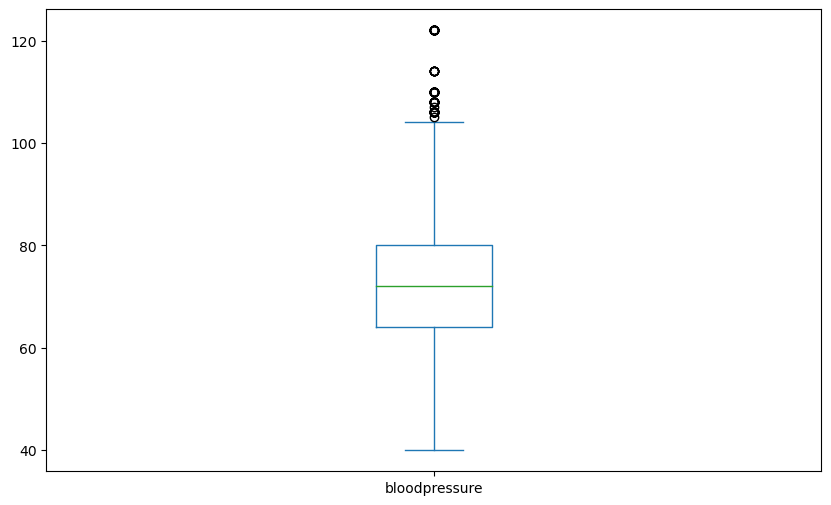

In [162]:
# Bloodpressure
health.bloodpressure.plot(kind="box")

In [155]:
health.loc[health.bloodpressure==0, "hereditary_diseases"].unique()

array(['EyeDisease', 'NoDisease', 'Arthritis', 'Obesity', 'Cancer'],
      dtype=object)

In [159]:
# Imputting Zeros in BloodPressure
health.loc[health.bloodpressure==0, "bloodpressure"]=80

In [161]:
health.bloodpressure.describe()

count    15000.000000
mean        72.682133
std         11.391688
min         40.000000
25%         64.000000
50%         72.000000
75%         80.000000
max        122.000000
Name: bloodpressure, dtype: float64

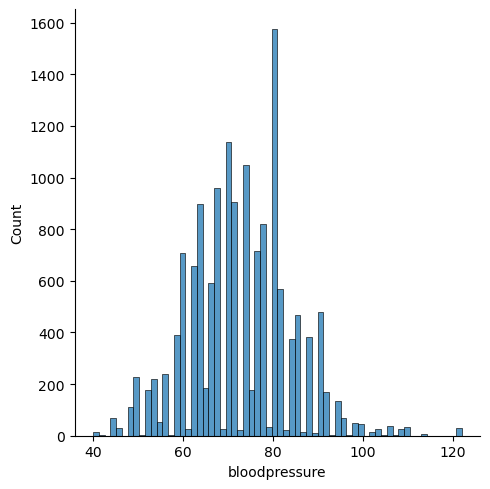

In [160]:
sns.displot(health.bloodpressure)

In [167]:
# TTest to check the Relation between BloodpRessure and Claim Amount
# Ho: No Relation between the BP and Claim Amount
# Ha: There is a Relation between the BP and Claim Amount

cols = ['bloodpressure', 'age', 'bmi']

for i in cols:
    print(i, ": ", stats.ttest_ind(health[i], health.claim))

bloodpressure :  Ttest_indResult(statistic=-134.3759940480079, pvalue=0.0)
age :  Ttest_indResult(statistic=-134.7096222566868, pvalue=0.0)
bmi :  Ttest_indResult(statistic=-134.80424624984414, pvalue=0.0)


In [168]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Diseases,Family,work_titles
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non_Fatal,Small_Family,Self_Employed
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non_Fatal,Small_Family,Salaried
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Fatal,Small_Family,Salaried
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Non_Fatal,Small_Family,Salaried
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non_Fatal,No_Dependents,Jobless


In [169]:
new = health.drop(["hereditary_diseases", 
                   "city", "job_title"], axis = 1)

In [170]:
new.head()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,Diseases,Family,work_titles
0,60.0,male,64,24.3,1,0,72,0,0,13112.6,Non_Fatal,Small_Family,Self_Employed
1,49.0,female,75,22.6,1,0,78,1,1,9567.0,Non_Fatal,Small_Family,Salaried
2,32.0,female,64,17.8,2,1,88,1,1,32734.2,Fatal,Small_Family,Salaried
3,61.0,female,53,36.4,1,1,72,1,0,48517.6,Non_Fatal,Small_Family,Salaried
4,19.0,female,50,20.6,0,0,82,1,0,1731.7,Non_Fatal,No_Dependents,Jobless


In [173]:
# cateogry encoding...
df = pd.get_dummies(new, drop_first = True)

## Modelling

* Linear Regression Model

In [174]:
# Lets Split the Data in Train and Test

from sklearn.model_selection import train_test_split
X = df.drop("claim", axis = 1)
y = df.claim
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.20,
                                               random_state = 0)

In [175]:
# OLS Summary ~ Add Constant
mytrain = sma.add_constant(xtrain)
mytest = sma.add_constant(xtest)

In [177]:
# Model
model = sma.OLS(ytrain, mytrain).fit()

In [179]:
# Compute the RMSE and R2
from sklearn.metrics import r2_score, mean_squared_error

pred_train = model.predict(mytrain)
pred_test = model.predict(mytest)
r2score = r2_score(ytest, pred_test) # R Squared
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train)) # Train RMSE
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test)) # Test RMSE

In [181]:
cols = ["Model_Name", "R-Squared", "Train RMSE", "Test RMSE"]
result = pd.DataFrame(columns = cols)

mlrmodel = pd.Series({"Model_Name":"Linear Regression", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)

result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.73963,6120.386056,6139.298742


In [182]:
# Ridge Regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(alpha = 0.5)

# Prediction
pred_train = ridge.fit(mytrain, ytrain).predict(mytrain)
pred_test = ridge.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [183]:
mlrmodel = pd.Series({"Model_Name":"Ridge", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)

result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.739630,6120.386056,6139.298742
1,Ridge,0.739628,6120.386613,6139.319243


In [186]:
# Lets Tune the Alpha
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01, 0.5, 0.9, 1, 2, 3, 5, 10, 15, 20]}

grid = GridSearchCV(estimator = ridge, param_grid = params,
                   scoring = "neg_root_mean_squared_error", 
                   cv = 50)

In [187]:
grid.fit(X, y) # Fitting and trying to find the best features
print(grid.best_params_)

{'alpha': 2}


In [190]:
# Tuned Parameter Model

ridge = Ridge(alpha = 2, normalize = True)

# Prediction
pred_train = ridge.fit(mytrain, ytrain).predict(mytrain)
pred_test = ridge.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [191]:
mlrmodel = pd.Series({"Model_Name":"Ridge(Alpha=2)", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)
result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.739630,6120.386056,6139.298742
1,Ridge,0.739628,6120.386613,6139.319243
2,Ridge(Alpha=2),0.739622,6120.394944,6139.386993
3,Ridge(Alpha=2),0.458577,8910.274326,8853.019082


In [192]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Prediction
pred_train = rf.fit(mytrain, ytrain).predict(mytrain)
pred_test = rf.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [193]:
mlrmodel = pd.Series({"Model_Name":"Random Forest", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)
result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.739630,6120.386056,6139.298742
1,Ridge,0.739628,6120.386613,6139.319243
2,Ridge(Alpha=2),0.739622,6120.394944,6139.386993
3,Ridge(Alpha=2),0.458577,8910.274326,8853.019082
4,Random Forest,0.968469,777.451386,2136.432717


In [197]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1e-1,
                  0.1, 0.2, 0.5, 0.7, 0.9, 1]}

grid = GridSearchCV(estimator = lasso, param_grid = params,
                   scoring = "neg_root_mean_squared_error", 
                   cv = 10)

grid.fit(X, y)
print(grid.best_params_)

{'alpha': 1}


In [198]:
lasso = Lasso(alpha = 1, normalize = True)

# Prediction
pred_train = lasso.fit(mytrain, ytrain).predict(mytrain)
pred_test = lasso.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [199]:
mlrmodel = pd.Series({"Model_Name":"Lasso", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)
result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.739630,6120.386056,6139.298742
1,Ridge,0.739628,6120.386613,6139.319243
2,Ridge(Alpha=2),0.739622,6120.394944,6139.386993
3,Ridge(Alpha=2),0.458577,8910.274326,8853.019082
4,Random Forest,0.968469,777.451386,2136.432717
5,Lasso,0.739507,6132.171349,6140.743536


In [202]:
# Elastic Net

from sklearn.linear_model import ElasticNet
enet = ElasticNet()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1e-1,
                  0.1, 0.2, 0.5, 0.7, 0.9, 1],
         "l1_ratio":[0.5, 1, 2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(estimator = enet, param_grid = params,
                   scoring = "neg_root_mean_squared_error", 
                   cv = 20)

grid.fit(X, y)
print(grid.best_params_)

{'alpha': 1e-05, 'l1_ratio': 0.5}


In [203]:
enet = ElasticNet(alpha = 1e-05, l1_ratio=0.5, normalize = True)

# Prediction
pred_train = enet.fit(mytrain, ytrain).predict(mytrain)
pred_test = enet.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [204]:
mlrmodel = pd.Series({"Model_Name":"Elastic Net", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)
result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,0.739630,6120.386056,6139.298742
1,Ridge,0.739628,6120.386613,6139.319243
2,Ridge(Alpha=2),0.739622,6120.394944,6139.386993
3,Ridge(Alpha=2),0.458577,8910.274326,8853.019082
4,Random Forest,0.968469,777.451386,2136.432717
5,Lasso,0.739507,6132.171349,6140.743536
6,Elastic Net,0.737599,6145.292879,6163.197412


In [205]:
health.claim.describe()

count    15000.000000
mean     13401.437620
std      12148.239619
min       1121.900000
25%       4846.900000
50%       9545.650000
75%      16519.125000
max      63770.400000
Name: claim, dtype: float64

In [207]:
# SGD Regressor Model...
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

# Prediction
pred_train = sgd.fit(mytrain, ytrain).predict(mytrain)
pred_test = sgd.fit(mytrain, ytrain).predict(mytest)

# r2 score
r2score = r2_score(ytest, pred_test)

# Train and Test RMSE
rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))

In [208]:
mlrmodel = pd.Series({"Model_Name":"SGD Regressor", "R-Squared":
                     r2score, "Train RMSE":rmse_train, 
                     "Test RMSE":rmse_test})

result = result.append(mlrmodel, ignore_index = True)
result

,Model_Name,R-Squared,Train RMSE,Test RMSE
0,Linear Regression,7.396299e-01,6.120386e+03,6.139299e+03
1,Ridge,7.396281e-01,6.120387e+03,6.139319e+03
2,Ridge(Alpha=2),7.396224e-01,6.120395e+03,6.139387e+03
3,Ridge(Alpha=2),4.585774e-01,8.910274e+03,8.853019e+03
4,Random Forest,9.684694e-01,7.774514e+02,2.136433e+03
5,Lasso,7.395073e-01,6.132171e+03,6.140744e+03
6,Elastic Net,7.375988e-01,6.145293e+03,6.163197e+03
7,SGD Regressor,-2.964000e+15,8.878350e+11,6.550316e+11
